In [24]:
import math

import numpy as np
from DanyaLab1.plot import plotter
from DanyaLab2 import methods as lab2
from scipy.optimize import approx_fprime
import methods

In [25]:
np.random.seed(12)


def generate_points(n, dim, f):
    X = np.random.rand(n, dim)
    y = []
    X_err = X + 0.1 * np.random.randn(n, dim)
    for x in X_err:
        y.append(f(x))
    return X, np.asarray(y)


# def mse(X, y, w):
#     res = 0
#     for i in range(0, len(y)):
#         x = 0
#         for j in range(0, len(X[i])):
#             x += X[i][j] * w[j]
#         res += np.square(y[i] - x)
#     return res / len(y)
#
#
# def mse_func(X, y):
#     return lambda w: mse(X, y, w)

def mse(f, w, X, y):
    diff = 0
    for i in range(0, len(X)):
        diff += (f(w)(X[i]) - y[i]) ** 2
    return diff

def mse_func(f, X, y):
    return lambda w: mse(f, w, X, y)

def grad_calculator(x, func, n):
    h = 1e-5
    res = []
    for i in range(n):
        delta = np.zeros(n)
        delta[i] = h
        res.append((func(x + delta) - func(x - delta)) / (2 * h))
    return np.asarray(res)


def grad_func(f, n):
    return lambda x: grad_calculator(x, f, n)

In [26]:
def target_func(x):
    return 5 * math.sin(x[0]) + 2 * math.exp(x[1])


def gauss_func(p):
    return lambda x: p[0] * x[0] + p[1] * x[1]


n = 100
dim = 2
(X, y) = generate_points(n, dim, target_func)
f = mse_func(gauss_func, X, y)
grad = grad_func(f, dim)
hess = lambda x0: approx_fprime(x0, lambda t: approx_fprime(t, f))

In [27]:
# func - np.array(float) -> float - Вычисляет значение функций в заданной точке
# gradFunc - np.array(float) -> np.array(float) - Вычисляет градиент в заданной точке
# hesseFunc - np.array(float) -> np.array(np.array(float)) - Вычисляет гессиан в заданной точке
# initialValue - np.array(float) - начальная точка
# initialTrustRadius - float - начальная доверенный радиус
# prec - float - точность, необходимая для ответа
def DogLeg(func, gradFunc, hesseFunc, initialValue, iterCount=20, initialTrustRadius=1.0, prec=1e-4):
    points = []
    curValue = initialValue
    trustRadius = initialTrustRadius
    maxTrustRadius = 100.0
    eta = 0.15

    for i in range(iterCount):
        points.append(curValue)
        grad = gradFunc(curValue)
        hes = hesseFunc(curValue)
        invHes = np.linalg.inv(hes)

        pk = nextValueDogLeg(func, gradFunc, hesseFunc, trustRadius, curValue)  # Неверное название

        actualRed = func(curValue) - func(curValue + pk)
        predRed = -(np.dot(grad, pk) + 0.5 * np.dot(pk, np.dot(hes, pk)))

        if predRed == 0.0:
            rhok = 1e99
        else:
            rhok = actualRed / predRed

        absPk = math.sqrt(np.dot(pk, pk))

        if rhok < 0.25:
            trustRadius = 0.25 * absPk
        elif rhok > 0.75 and absPk == trustRadius:
            trustRadius = min(2.0 * trustRadius, maxTrustRadius)

        if rhok > eta:
            curValue = curValue + pk

        if np.linalg.norm(grad) < prec:
            break
    return points


def nextValueDogLeg(func, gradFunc, hesseFunc, trustRadius, curValue):
    grad = gradFunc(curValue)
    hes = hesseFunc(curValue)

    analyticAns = -np.dot(np.linalg.inv(hes), grad)
    absAnalyticAns = np.linalg.norm(analyticAns)  # Заменить на np.linalg.norm

    if (absAnalyticAns <= trustRadius):
        return analyticAns

    pu = - (np.dot(grad, grad) / np.dot(grad, np.dot(hes, grad))) * grad
    absPu = np.linalg.norm(pu)  # Заменить на np.linalg.norm

    if (absPu >= trustRadius):
        return (trustRadius * pu) / absPu

    # Всё, что дальше - переписать
    pB_pU = analyticAns - pu
    dot_pB_pU = np.dot(pB_pU, pB_pU)
    dot_pU_pB_pU = np.dot(pu, pB_pU)
    fact = dot_pU_pB_pU ** 2 - dot_pB_pU * (np.dot(pu, pu) - trustRadius ** 2)
    tau = (-dot_pU_pB_pU + math.sqrt(fact)) / dot_pB_pU
    return pu + tau * pB_pU

In [28]:
def print_info(name, start, points, grad_calc, func_calc):
    print("start:", start)
    print("{}:".format(name))
    print(points[-1], f(points[-1]))
    print("gradient calculations:", grad_calc)
    print("function calculations:", func_calc)


def plot_from_start(start):
    lr = lambda x: 2

    # (points1, grad_calc1, func_calc1) = lab2.sgd_with_momentum(f, grad, start, learning_rate=lr)
    # print_info("Momentum", start, points1, grad_calc1, func_calc1)

    # (points2, grad_calc2, func_calc2) = lab2.sgd_nesterov(f, grad, start, learning_rate=lr)
    # print_info("Nesterov", start, points2, grad_calc2, func_calc2)

    #(points3, grad_calc3, func_calc3) = lab2.sgd_adagrad(f, grad, start, learning_rate=lr)
    #print_info("AdaGrad", start, points3, grad_calc3, func_calc3)

    #(points4, grad_calc4, func_calc4) = lab2.sgd_rmsprop(f, grad, start, learning_rate=lr)
    #print_info("RMSProp", start, points4, grad_calc4, func_calc4)

    #(points5, grad_calc5, func_calc5) = lab2.sgd_adam(f, grad, start, learning_rate=lr)
    #print_info("Adam", start, points5, grad_calc5, func_calc5)

    #(points6, grad_calc6, func_calc6) = methods.bfgs(f, grad, start)
    #print_info("BFGS", start, points6, grad_calc6, func_calc6)

    (points7, grad_calc7, func_calc7) = methods.l_bfgs(f, grad, start)
    print_info("L-BFGS", start, points7, grad_calc7, func_calc7)

    #(points8, grad_calc8, func_calc8) = methods.gauss_newton(gauss_func, methods.jacobian_gauss, X, y, start, eps=1e-6)
    #print_info("Gauss-Newton", start, points8, grad_calc8, func_calc8)

    #(points9, grad_calc9, func_calc9) = methods.trust_region_dogleg(f, grad, hess, start)
    #print(points9)
    #print_info("Powell Dog Leg", start, points9, grad_calc9, func_calc9)

    points = DogLeg(f, grad, hess, start)
    print_info("Powell Dog Leg2", start, points, 0, 0)

    #plotter.multiple_points_over_contour(f, points1, points2, name1="Momentum", name2="Nesterov").show()

    # plotter.multiple_points_over_contour(f, points4, points3, name1="RMSProp", name2="AdaGrad",).show()

    # plotter.multiple_points_over_contour(f, points5, name1="Adam").show()

    # plotter.multiple_points_over_contour(f, points6, name1="BFGS").show()

    #plotter.multiple_points_over_contour(f, points7, name1="L-BFGS").show()

    #plotter.multiple_points_over_contour(f, points8, name1="Gauss-Newton").show()

    #plotter.multiple_points_over_contour(f, points9, name1="Powell Dog Leg").show()
    plotter.multiple_points_over_contour(f, points, name1="Powell Dog Leg2").show()

start: [5, 12]
L-BFGS:
[5.88695703 4.98540314] 81.46123469805364
gradient calculations: 25
function calculations: 20
start: [5, 12]
Powell Dog Leg2:
[ 5.65413692 11.63468122] 1678.078326880263
gradient calculations: 0
function calculations: 0


TypeError: list indices must be integers or slices, not tuple

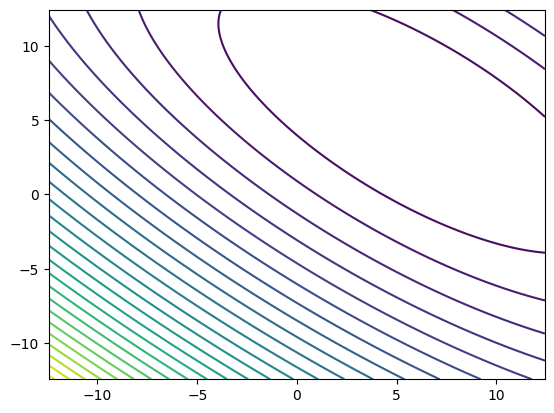

In [29]:
plot_from_start([5, 12])

In [ ]:
plot_from_start([-0.5, 0])

In [ ]:
plot_from_start([2, 3])

In [ ]:
plot_from_start([-10, 0])

In [ ]:
plot_from_start([0.9504983984550248, -0.766835117539493])

In [ ]:
#generate 4 dots
dots = plotter.generate_n_dots(4)

In [ ]:
for i in dots:
    plot_from_start(i)
